In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

In [4]:
X.shape,y.shape

((100, 2), (100,))

<Axes: >

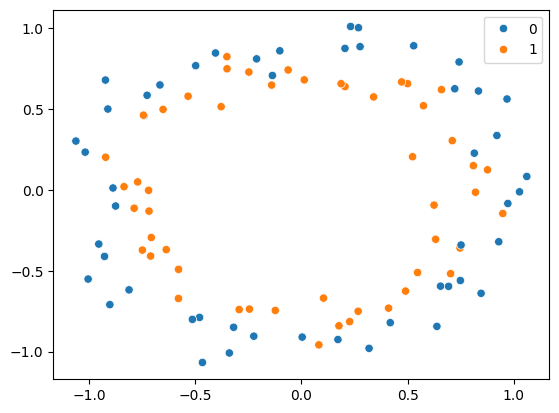

In [8]:
import seaborn as sns
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [19]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 256)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

#Using Early stopping

**Early stopping is a regularization technique used in machine learning to prevent overfitting during the training of models, particularly in iterative optimization algorithms like gradient descent.

How It Works
1. Training and Validation Data:

The dataset is split into training and validation sets.
The model is trained on the training data, but performance is monitored on the validation data.
2. Monitoring a Metric:

A performance metric (e.g., validation loss or accuracy) is evaluated on the validation set at the end of each training epoch.
3. Stopping Criterion:

Training stops when the validation metric stops improving for a predefined number of epochs (often called the "patience"). This indicates that the model is starting to overfit the training data.
4. Checkpointing:

Optionally, the model parameters from the epoch with the best validation performance can be saved and used as the final model.
**

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
# callback=EarlyStopping(
#     monitor='val_loss',
#     min_delta=0.00001,
#     patience=20,
#     verbose=1,
#     mode='auto',
#     baseline=None,
#     restore_best_weights=False
# )
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [23]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - accuracy: 0.5852 - loss: 0.6952 - val_accuracy: 0.4500 - val_loss: 0.6965
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5336 - loss: 0.6943 - val_accuracy: 0.4500 - val_loss: 0.6974
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5242 - loss: 0.6944 - val_accuracy: 0.3500 - val_loss: 0.6968
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5406 - loss: 0.6923 - val_accuracy: 0.4000 - val_loss: 0.6971
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5367 - loss: 0.6922 - val_accuracy: 0.2500 - val_loss: 0.6981
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5625 - loss: 0.6906 - val_accuracy: 0.4500 - val_loss: 0.6993
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5617 - loss: 0.6884 - val_accuracy: 0.4000 - val_loss: 0.7018
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5242 - loss: 0.6880 - val_accuracy: 0.4000 - 

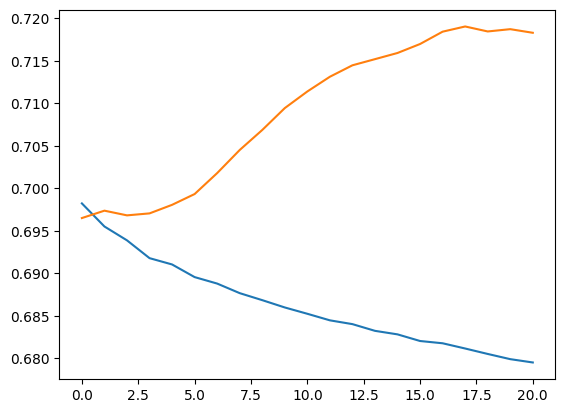

In [24]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')